In [152]:
import pandas as pd
import numpy as np

In [159]:
data = pd.read_csv("news_data_all_labeled.csv")


In [160]:
data.shape[0]

11021

In [161]:
data

,Unnamed: 0,Published Date,Title,AllSides Content,URL,News Channel,News Channel URL,Bias,Tags,topic,News Article Content,Processed text,Title_Sentiment_nltk,Sentiment_Content_nltk,Title_Sentiment_huggingface_a,Title_Sentiment_huggingface_b,Sentiment_Content_huggingface_b
0,0,Feb 21 2024,Reproductive policy fights renew the focus on IVF,An Alabama Supreme Court decision legally reco...,https://www.allsides.com/news/2024-02-21-1315/...,Roll Call,https://rollcall.com/2024/02/20/reproductive-p...,center,"['Supreme Court', 'Healthcare', 'Pregnancy', '...",abortion,An Alabama Supreme Court decision legally reco...,alabama supreme court decision legally recogni...,-0.4019,0.9900,0.865067,0.543246,0.536185
1,1,Mar 24 2024,'Some serious stigma': Arizona lawmaker explai...,Democratic Sen. Eva Burch got call from VP Har...,https://www.allsides.com/news/2024-03-24-1430/...,12News,https://12news.com/article/news/politics/sunda...,center,['Abortion'],abortion,Democratic Sen. Eva Burch got call from VP Har...,democratic sen. eva burch got call vp harris s...,-0.0772,0.9524,0.859620,0.542583,0.520938
2,2,Apr 08 2024,Trump says he’s in favor of letting states dec...,NEW YORK — Former President Donald Trump said ...,https://www.allsides.com/news/2024-04-08-1130/...,San Jose Mercury News,https://mercurynews.com/2024/04/08/trump-says-...,left,['Abortion'],abortion,By Jill Colvin | Associated Press\n\nNEW YORK ...,jill colvin | associated press new york — form...,0.4019,0.7886,0.728386,0.544220,0.525326
3,3,Mar 01 2024,CVS and Walgreens Will Begin Selling Abortion ...,The two largest pharmacy chains in the United ...,https://www.allsides.com/news/2024-03-01-1330/...,New York Times (News),https://www.nytimes.com/2024/03/01/health/abor...,left,"['Abortion', 'Abortion Pills', 'Public Health'...",abortion,The two largest pharmacy chains in the United ...,two largest pharmacy chain united state start ...,0.0000,0.9612,0.934649,0.538811,0.518969
4,4,Feb 02 2024,Wyoming Supreme Court Says Pro-Lifers Can't In...,The Wyoming Supreme Court on Friday denied a p...,https://www.allsides.com/news/2024-02-02-1225/...,Cowboy State Daily,https://cowboystatedaily.com/2024/02/02/wyomin...,right,"['Abortion', 'Supreme Court']",abortion,The Wyoming Supreme Court on Friday denied a p...,wyoming supreme court friday denied petition t...,0.4019,0.9217,0.802395,0.537625,0.526178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11016,11016,Apr 02 2024,‘Every State Is Now A Border State’: Trump Vis...,Former President Donald Trump traveled to Gran...,https://www.allsides.com/news/2024-04-02-1408/...,The Daily Wire,https://www.dailywire.com/news/every-state-is-...,right,"['2024 Presidential Election', 'Donald Trump',...",immigration,Former President Donald Trump traveled to Gran...,former president donald trump traveled grand r...,-0.8519,-0.9986,0.883422,0.537039,0.535433
11017,11017,Apr 05 2024,NYC migrant squatter admitted to being Tren De...,A suspected member of a Venezuelan gang who wa...,https://www.allsides.com/news/2024-04-05-1630/...,Fox News (Online News),https://foxnews.com/us/nyc-migrant-squatter-ad...,right,['General News'],immigration,A suspected member of a Venezuelan gang who wa...,suspected member venezuelan gang arrested rele...,-0.4404,-0.9953,0.778417,0.523424,0.534939
11018,11018,Apr 06 2024,Only on 13: Indian immigrant denies staging ro...,Only on 13: Indian immigrant denies staging ro...,https://www.allsides.com/news/2024-04-07-0645/...,ABC13 Houston,https://abc13.com/robbery-victim-denies-crime-...,center,"['Crime', 'General News']",immigration,Only on 13: Indian immigrant denies staging ro...,13 : indian immigrant denies staging robbery o...,-0.4215,-0.9935,0.905513,0.556402,0.547916
11019,11019,Apr 07 2024,Zoe Saldana puts face on illegal immigration i...,As a couple Zoe Saldaña and Marco Perego have ...,https://www.allsides.com/news/2024-04-07-2230/...,Boston Herald,https://bostonherald.com/2024/04/08/zoe-saldan...,right,['I

In [162]:
data = data[["Published Date","Title","URL","News Channel","News Channel URL","Bias","Tags","topic",\
             "News Article Content","Processed text","Sentiment_Content_nltk"]]
data.head(10)

,Published Date,Title,URL,News Channel,News Channel URL,Bias,Tags,topic,News Article Content,Processed text,Sentiment_Content_nltk
0,Feb 21 2024,Reproductive policy fights renew the focus on IVF,https://www.allsides.com/news/2024-02-21-1315/...,Roll Call,https://rollcall.com/2024/02/20/reproductive-p...,center,"['Supreme Court', 'Healthcare', 'Pregnancy', '...",abortion,An Alabama Supreme Court decision legally reco...,alabama supreme court decision legally recogni...,0.9900
1,Mar 24 2024,'Some serious stigma': Arizona lawmaker explai...,https://www.allsides.com/news/2024-03-24-1430/...,12News,https://12news.com/article/news/politics/sunda...,center,['Abortion'],abortion,Democratic Sen. Eva Burch got call from VP Har...,democratic sen. eva burch got call vp harris s...,0.9524
2,Apr 08 2024,Trump says he’s in favor of letting states dec...,https://www.allsides.com/news/2024-04-08-1130/...,San Jose Mercury News,https://mercurynews.com/2024/04/08/trump-says-...,left,['Abortion'],abortion,By Jill Colvin | Associated Press\n\nNEW YORK ...,jill colvin | associated press new york — form...,0.7886
3,Mar 01 2024,CVS and Walgreens Will Begin Selling Abortion ...,https://www.allsides.com/news/2024-03-01-1330/...,New York Times (News),https://www.nytimes.com/2024/03/01/health/abor...,left,"['Abortion', 'Abortion Pills', 'Public Health'...",abortion,The two largest pharmacy chains in the United ...,two largest pharmacy chain united state start ...,0.9612
4,Feb 02 2024,Wyoming Supreme Court Says Pro-Lifers Can't In...,https://www.allsides.com/news/2024-02-02-1225/...,Cowboy State Daily,https://cowboystatedaily.com/2024/02/02/wyomin...,right,"['Abortion', 'Supreme Court']",abortion,The Wyoming Supreme Court on Friday denied a p...,wyoming supreme court friday denied petition t...,0.9217
5,Feb 13 2024,"New gun, abortion and labor laws take effect i...",https://www.allsides.com/news/2024-02-13-0322/...,Detroit Free Press,https://freep.com/story/news/politics/2024/02/...,left,['Abortion'],abortion,New Michigan laws approved by Democrats take e...,new michigan law approved democrat take effect...,-0.9689
6,Apr 04 2024,Latest 2024 election news: Harris returning to...,https://www.allsides.com/news/2024-04-04-0430/...,Washington Post,https://washingtonpost.com/elections/2024/04/0...,left,"['2024 Elections', 'Politics']",abortion,Election 2024\n\nGet the latest news on the 20...,election 2024 get latest news 2024 election re...,0.7964
7,Mar 25 2024,New York pro-lifers march with ‘joy on steroids’,https://www.allsides.com/news/2024-03-26-0015/...,Catholic News Agency,https://catholicnewsagency.com/news/257193/pho...,right,['General News'],abortion,The New York Police Department arrested at lea...,new york police department arrested least eigh...,0.8101
8,Apr 08 2024,Trump says he’s in favor of letting states dec...,https://www.allsides.com/news/2024-04-08-1130/...,San Jose Mercury News,https://mercurynews.com/2024/04/08/trump-says-...,left,['Abortion'],abortion,By Jill Colvin | Associated Press\n\nNEW YORK ...,jill colvin | associated press new york — form...,0.7886
9,Mar 27 2024,How A Leftist Network Of Websites Floods Red S...,https://www.allsides.com/news/2024-03-27-1548/...,The Daily Wire,https://www.dailywire.com/news/how-leftist-net...,right,"['Abortion', 'Misinformation And Disinformatio...",abortion,"Facilitated by Left-wing activist groups, a ne...","facilitated left-wing activist group , network...",0.9988


In [163]:
data.Bias.value_counts()

Bias
center    4728
left      3204
right     2484
rated      592
Name: count, dtype: int64

In [164]:
data.topic.value_counts()

topic
immigration       2997
abortion          2605
environment       1408
healthcare        1402
sustainability    1325
public-health     1284
Name: count, dtype: int64

In [165]:
topic_mapping = {
    'public-health': 'Public Healthcare',
    'healthcare': 'Public Healthcare',
    'environment':'Environment and Sustainability',
    'sustainability':'Environment and Sustainability',
    'abortion':'Abortion',
    'immigration':"Immigration"
}

# Replace the old topics with the new combined topic
data['topic'] = data['topic'].replace(topic_mapping)


/var/folders/0g/5jl4b1d12lvc6g70prn2_rnr0000gn/T/ipykernel_62143/4254101969.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['topic'] = data['topic'].replace(topic_mapping)


In [166]:
abortion_data = data[data["topic"]=="Abortion"]

(abortion_data.head(10))


,Published Date,Title,URL,News Channel,News Channel URL,Bias,Tags,topic,News Article Content,Processed text,Sentiment_Content_nltk
0,Feb 21 2024,Reproductive policy fights renew the focus on IVF,https://www.allsides.com/news/2024-02-21-1315/...,Roll Call,https://rollcall.com/2024/02/20/reproductive-p...,center,"['Supreme Court', 'Healthcare', 'Pregnancy', '...",Abortion,An Alabama Supreme Court decision legally reco...,alabama supreme court decision legally recogni...,0.9900
1,Mar 24 2024,'Some serious stigma': Arizona lawmaker explai...,https://www.allsides.com/news/2024-03-24-1430/...,12News,https://12news.com/article/news/politics/sunda...,center,['Abortion'],Abortion,Democratic Sen. Eva Burch got call from VP Har...,democratic sen. eva burch got call vp harris s...,0.9524
2,Apr 08 2024,Trump says he’s in favor of letting states dec...,https://www.allsides.com/news/2024-04-08-1130/...,San Jose Mercury News,https://mercurynews.com/2024/04/08/trump-says-...,left,['Abortion'],Abortion,By Jill Colvin | Associated Press\n\nNEW YORK ...,jill colvin | associated press new york — form...,0.7886
3,Mar 01 2024,CVS and Walgreens Will Begin Selling Abortion ...,https://www.allsides.com/news/2024-03-01-1330/...,New York Times (News),https://www.nytimes.com/2024/03/01/health/abor...,left,"['Abortion', 'Abortion Pills', 'Public Health'...",Abortion,The two largest pharmacy chains in the United ...,two largest pharmacy chain united state start ...,0.9612
4,Feb 02 2024,Wyoming Supreme Court Says Pro-Lifers Can't In...,https://www.allsides.com/news/2024-02-02-1225/...,Cowboy State Daily,https://cowboystatedaily.com/2024/02/02/wyomin...,right,"['Abortion', 'Supreme Court']",Abortion,The Wyoming Supreme Court on Friday denied a p...,wyoming supreme court friday denied petition t...,0.9217
5,Feb 13 2024,"New gun, abortion and labor laws take effect i...",https://www.allsides.com/news/2024-02-13-0322/...,Detroit Free Press,https://freep.com/story/news/politics/2024/02/...,left,['Abortion'],Abortion,New Michigan laws approved by Democrats take e...,new michigan law approved democrat take effect...,-0.9689
6,Apr 04 2024,Latest 2024 election news: Harris returning to...,https://www.allsides.com/news/2024-04-04-0430/...,Washington Post,https://washingtonpost.com/elections/2024/04/0...,left,"['2024 Elections', 'Politics']",Abortion,Election 2024\n\nGet the latest news on the 20...,election 2024 get latest news 2024 election re...,0.7964
7,Mar 25 2024,New York pro-lifers march with ‘joy on steroids’,https://www.allsides.com/news/2024-03-26-0015/...,Catholic News Agency,https://catholicnewsagency.com/news/257193/pho...,right,['General News'],Abortion,The New York Police Department arrested at lea...,new york police department arrested least eigh...,0.8101
8,Apr 08 2024,Trump says he’s in favor of letting states dec...,https://www.allsides.com/news/2024-04-08-1130/...,San Jose Mercury News,https://mercurynews.com/2024/04/08/trump-says-...,left,['Abortion'],Abortion,By Jill Colvin | Associated Press\n\nNEW YORK ...,jill colvin | associated press new york — form...,0.7886
9,Mar 27 2024,How A Leftist Network Of Websites Floods Red S...,https://www.allsides.com/news/2024-03-27-1548/...,The Daily Wire,https://www.dailywire.com/news/how-leftist-net...,right,"['Abortion', 'Misinformation And Disinformatio...",Abortion,"Facilitated by Left-wing activist groups, a ne...","facilitated left-wing activist group , network...",0.9988


In [167]:
data["Sentiment_Content_nltk"] = data["Sentiment_Content_nltk"].round(2)
data = data.rename(columns={'Sentiment_Content_nltk': 'Label'})

data.rename

/var/folders/0g/5jl4b1d12lvc6g70prn2_rnr0000gn/T/ipykernel_62143/2696401725.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Sentiment_Content_nltk"] = data["Sentiment_Content_nltk"].round(2)


<bound method DataFrame.rename of       Published Date                                              Title  \
0        Feb 21 2024  Reproductive policy fights renew the focus on IVF   
1        Mar 24 2024  'Some serious stigma': Arizona lawmaker explai...   
2        Apr 08 2024  Trump says he’s in favor of letting states dec...   
3        Mar 01 2024  CVS and Walgreens Will Begin Selling Abortion ...   
4        Feb 02 2024  Wyoming Supreme Court Says Pro-Lifers Can't In...   
...              ...                                                ...   
11016    Apr 02 2024  ‘Every State Is Now A Border State’: Trump Vis...   
11017    Apr 05 2024  NYC migrant squatter admitted to being Tren De...   
11018    Apr 06 2024  Only on 13: Indian immigrant denies staging ro...   
11019    Apr 07 2024  Zoe Saldana puts face on illegal immigration i...   
11020    Mar 20 2024  Hstoday Del Rio Port of Entry CBP Officers Int...   

                                                     URL  \
0    

In [168]:
data["text_len"] = data["Processed text"].apply(lambda x:len(x))

In [169]:
data

,Published Date,Title,URL,News Channel,News Channel URL,Bias,Tags,topic,News Article Content,Processed text,Label,text_len
0,Feb 21 2024,Reproductive policy fights renew the focus on IVF,https://www.allsides.com/news/2024-02-21-1315/...,Roll Call,https://rollcall.com/2024/02/20/reproductive-p...,center,"['Supreme Court', 'Healthcare', 'Pregnancy', '...",Abortion,An Alabama Supreme Court decision legally reco...,alabama supreme court decision legally recogni...,0.99,3025
1,Mar 24 2024,'Some serious stigma': Arizona lawmaker explai...,https://www.allsides.com/news/2024-03-24-1430/...,12News,https://12news.com/article/news/politics/sunda...,center,['Abortion'],Abortion,Democratic Sen. Eva Burch got call from VP Har...,democratic sen. eva burch got call vp harris s...,0.95,3923
2,Apr 08 2024,Trump says he’s in favor of letting states dec...,https://www.allsides.com/news/2024-04-08-1130/...,San Jose Mercury News,https://mercurynews.com/2024/04/08/trump-says-...,left,['Abortion'],Abortion,By Jill Colvin | Associated Press\n\nNEW YORK ...,jill colvin | associated press new york — form...,0.79,6245
3,Mar 01 2024,CVS and Walgreens Will Begin Selling Abortion ...,https://www.allsides.com/news/2024-03-01-1330/...,New York Times (News),https://www.nytimes.com/2024/03/01/health/abor...,left,"['Abortion', 'Abortion Pills', 'Public Health'...",Abortion,The two largest pharmacy chains in the United ...,two largest pharmacy chain united state start ...,0.96,666
4,Feb 02 2024,Wyoming Supreme Court Says Pro-Lifers Can't In...,https://www.allsides.com/news/2024-02-02-1225/...,Cowboy State Daily,https://cowboystatedaily.com/2024/02/02/wyomin...,right,"['Abortion', 'Supreme Court']",Abortion,The Wyoming Supreme Court on Friday denied a p...,wyoming supreme court friday denied petition t...,0.92,5277
...,...,...,...,...,...,...,...,...,...,...,...,...
11016,Apr 02 2024,‘Every State Is Now A Border State’: Trump Vis...,https://www.allsides.com/news/2024-04-02-1408/...,The Daily Wire,https://www.dailywire.com/news/every-state-is-...,right,"['2024 Presidential Election', 'Donald Trump',...",Immigration,Former President Donald Trump traveled to Gran...,former president donald trump traveled grand r...,-1.00,2249
11017,Apr 05 2024,NYC migrant squatter admitted to being Tren De...,https://www.allsides.com/news/2024-04-05-1630/...,Fox News (Online News),https://foxnews.com/us/nyc-migrant-squatter-ad...,right,['General News'],Immigration,A suspected member of a Venezuelan gang who wa...,suspected member venezuelan gang arrested rele...,-1.00,2285
11018,Apr 06 2024,Only on 13: Indian immigrant denies staging ro...,https://www.allsides.com/news/2024-04-07-0645/...,ABC13 Houston,https://abc13.com/robbery-victim-denies-crime-...,center,"['Crime', 'General News']",Immigration,Only on 13: Indian immigrant denies staging ro...,13 : indian immigrant denies staging robbery o...,-0.99,1739
11019,Apr 07 2024,Zoe Saldana puts face on illegal immigration i...,https://www.allsides.com/news/2024-04-07-2230/...,Boston Herald,https://bostonherald.com/2024/04/08/zoe-saldan...,right,['Immigration'],Immigration,As a couple Zoe Saldaña and Marco Perego have ...,couple zoe saldaña marco perego given year mak...,0.54,1656


# Abortion Results

In [195]:
import seaborn as sns
import matplotlib.pyplot as plt
# convert bias numbers to labels

def create_histpgram(data,topic):
    data = data[(data["topic"]==topic) & (data["Bias"]!="rated")]

    data['Bias'] = data['Bias'].replace({"left": 'Left', "center": 'Center', "right": 'Right'})
    sns.set_style('whitegrid')
    # visualize sentiment in relation to bias

    g = sns.FacetGrid(data=data, col='Bias', col_wrap= 3)
    g.map(plt.hist, 'Label', bins=25)
    plt.savefig('histogram.png', bbox_inches='tight')


def create_boxplot(data,topic):
    data = data[(data["topic"]==topic) & (data["Bias"]!="rated")]
    plt.figure(figsize=(12,6))
    sns.boxplot(x='Bias', y='Label', data=data)

def densityplot(dimension,data,topic):
    data = data[(data["topic"]==topic) & (data["Bias"]!="rated")]
    # Initialize the FaceGrid object
    sns.set(style="white", rc={'axes.facecolor': (0, 0, 0, 0)})
    pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
    g = sns.FacetGrid(data, row="Bias", hue="Bias",
                      aspect=15, palette=pal)

    # Draw the densities in a few steps
    g.map(sns.kdeplot, dimension, clip_on=False,
          shade=True, alpha=1, lw=1.5, bw=.2)
    g.map(sns.kdeplot, dimension, clip_on=False, color='w', lw=2, bw=.2)
    g.map(plt.axhline, y=0, lw=2, clip_on=False)

    # Define and use a simple function to label the plot in axes coordinates
    def label(x, color, label):
        ax = plt.gca()
        ax.text(0, .2, label, fontweight='bold', color=color,
                ha='Left', va='Center', transform=ax.transAxes)

        # Set the subplot to overlap
        g.map(label, dimension)

        # Remove axes details that don't play will with overlap
        g.set_titles('')
        g.set(yticks=[])
        g.despine(bottom=True, left=True)

        return g


def news_channel_dist(data,topic):
    data = data[(data["topic"]==topic) & (data["Bias"]!="rated")]
    # Set the size of the figure
    plt.figure(figsize=(8, 6))

    # Group by 'Bias', count occurrences in 'News Channel', and plot
    unique_biases = data.groupby('Bias')["News Channel"].count()
    ax = unique_biases.plot(kind='bar', color='lightblue')  # ax is the AxesSubplot object returned by plot

    # Set titles and labels
    ax.set_title('News Channel Distribution for Each Bias')
    ax.set_xlabel('Bias')
    ax.set_ylabel('Number of News Channels')

    # Show the plot
    plt.show()


def distribution(data,topic):
    data = data[(data["topic"]==topic) & (data["Bias"]!="rated")]
    bybias = data.groupby('Bias')
    print(bybias['text_len'].describe())


# Abortion

/var/folders/0g/5jl4b1d12lvc6g70prn2_rnr0000gn/T/ipykernel_62143/3432250000.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Bias'] = data['Bias'].replace({"left": 'Left', "center": 'Center', "right": 'Right'})
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:854: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.2`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  func(*plot_args, **plot_kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`;

         count         mean          std    min     25%     50%     75%  \
Bias                                                                      
center   747.0  2984.540830  2131.406164   47.0  1468.0  2741.0  3923.0   
left    1050.0  3726.575238  3014.762871  102.0  1654.0  3577.0  4954.0   
right    730.0  3649.400000  2441.159207  670.0  2052.0  3159.0  4302.0   

            max  
Bias             
center  13257.0  
left    21072.0  
right   16067.0  


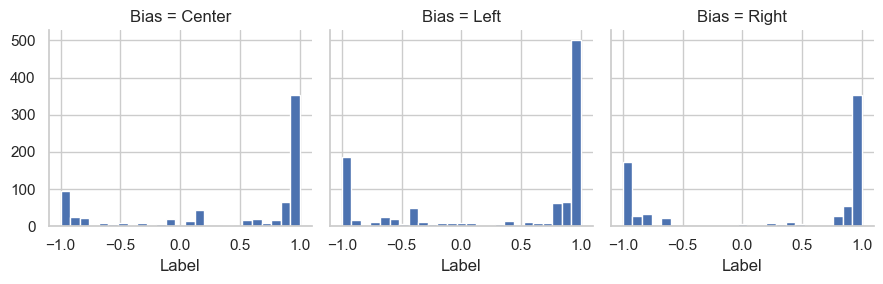

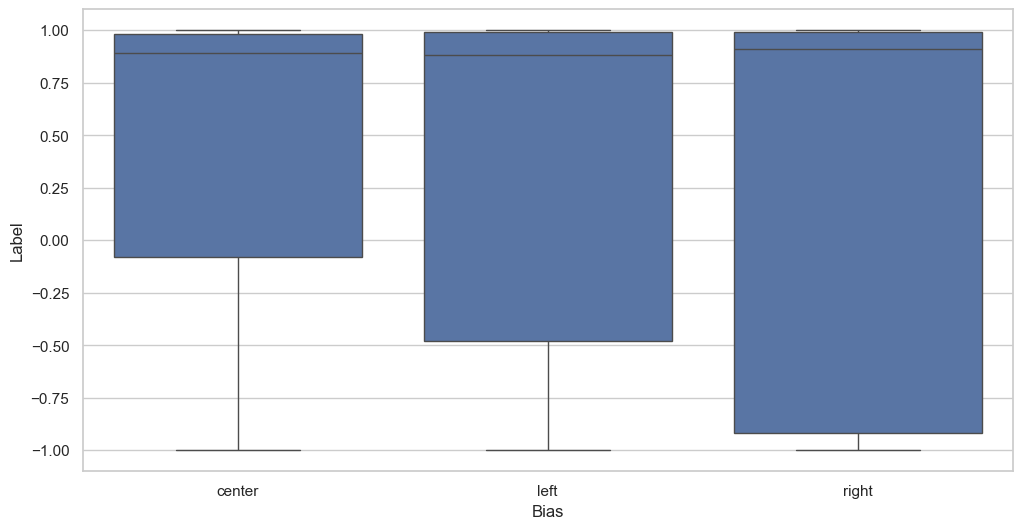

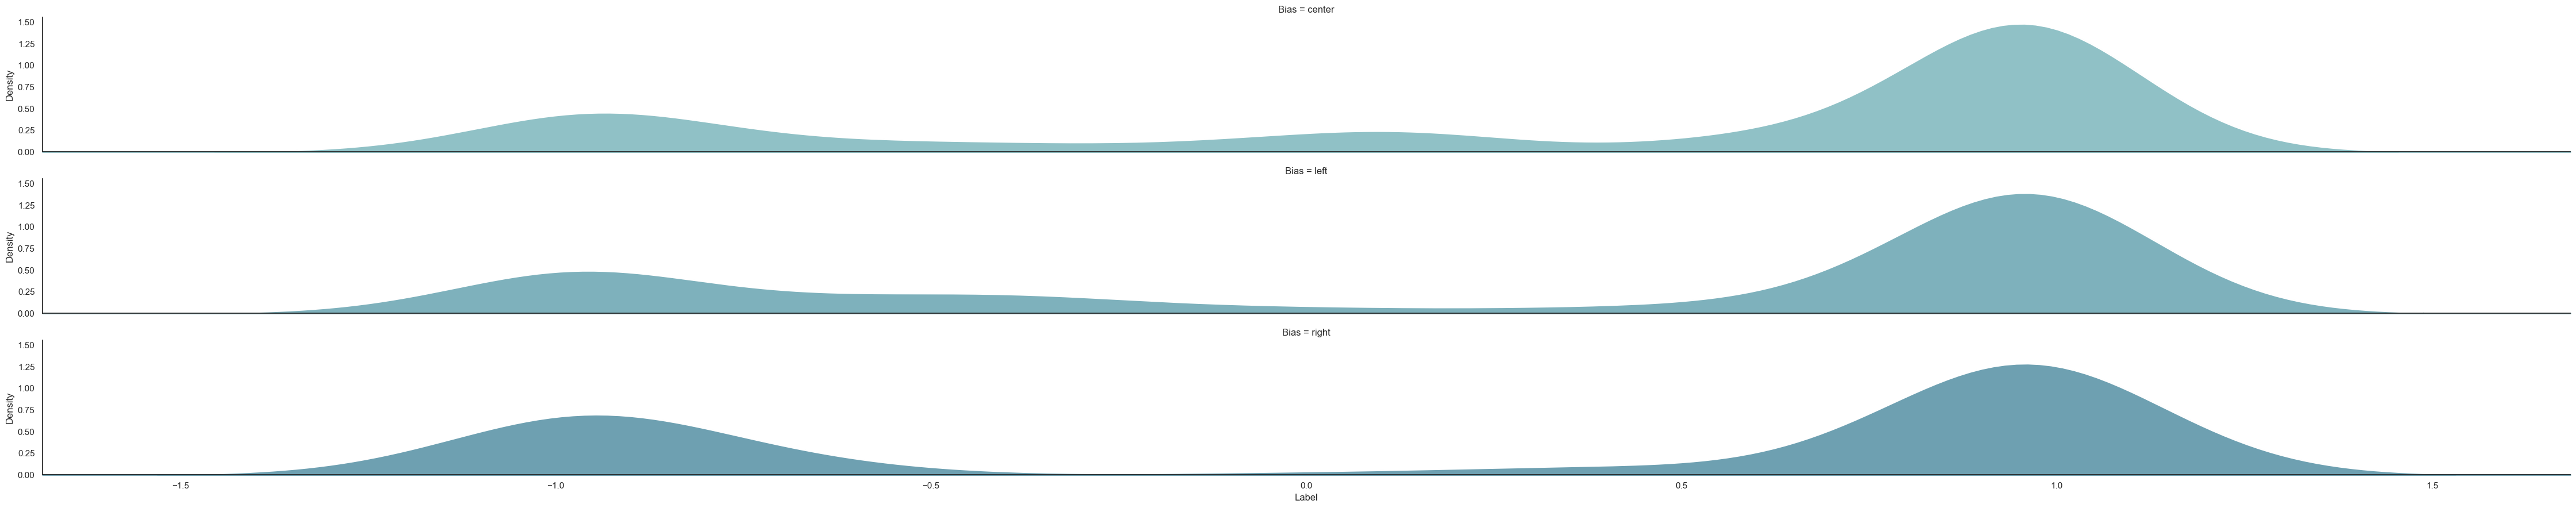

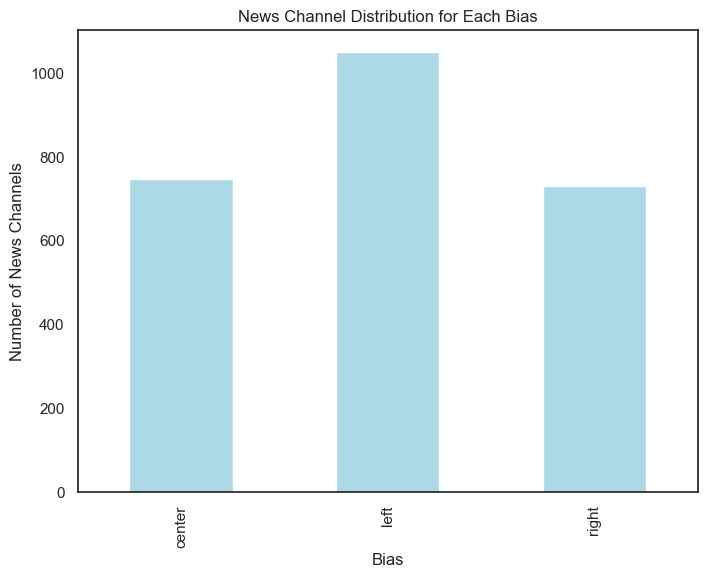

In [205]:
create_histpgram(data,"Abortion")
create_boxplot(data,"Abortion")
sentiment_plot = densityplot('Label',data,"Abortion") 
distribution(data,"Abortion")
news_channel_dist(data,"Abortion")


# 

# Immigration

/var/folders/0g/5jl4b1d12lvc6g70prn2_rnr0000gn/T/ipykernel_62143/3432250000.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Bias'] = data['Bias'].replace({"left": 'Left', "center": 'Center', "right": 'Right'})
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:854: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.2`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  func(*plot_args, **plot_kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`;

         count         mean          std     min     25%     50%     75%  \
Bias                                                                       
center   931.0  3129.584318  2347.812992   112.0  1716.0  2759.0  4376.5   
left     784.0  3552.107143  2381.906917   449.0  1762.0  3153.0  4755.0   
right   1124.0  2970.321174  1555.656319  1052.0  1969.0  2533.0  3651.0   

            max  
Bias             
center  15778.0  
left    13000.0  
right   12566.0  


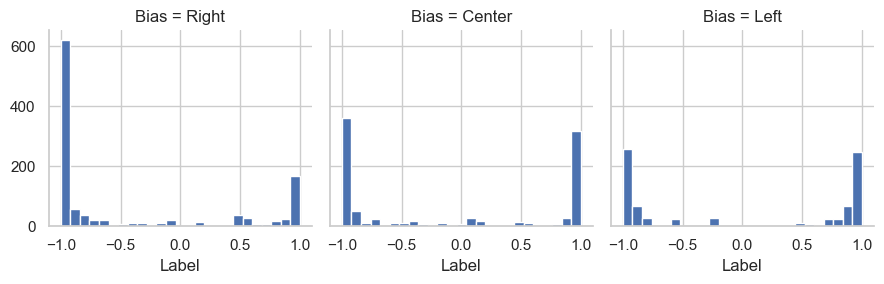

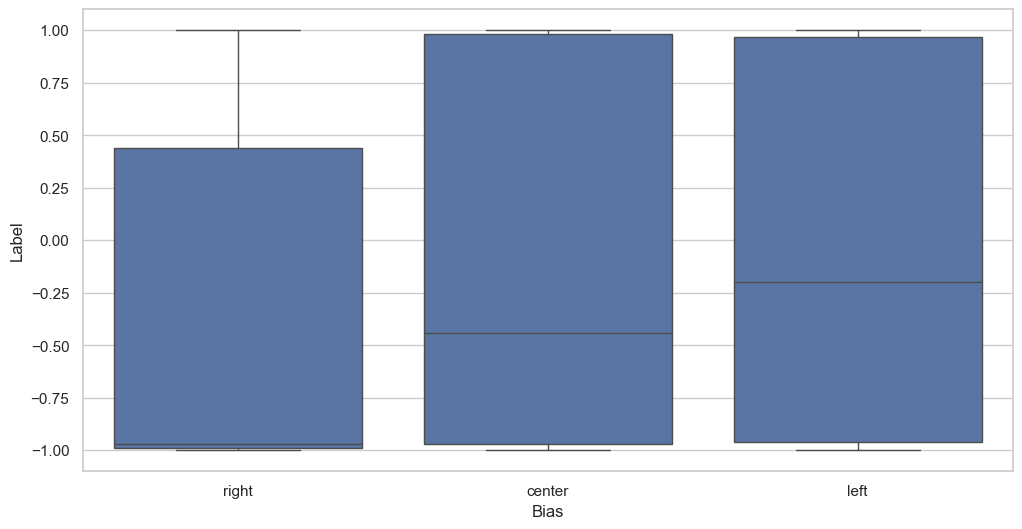

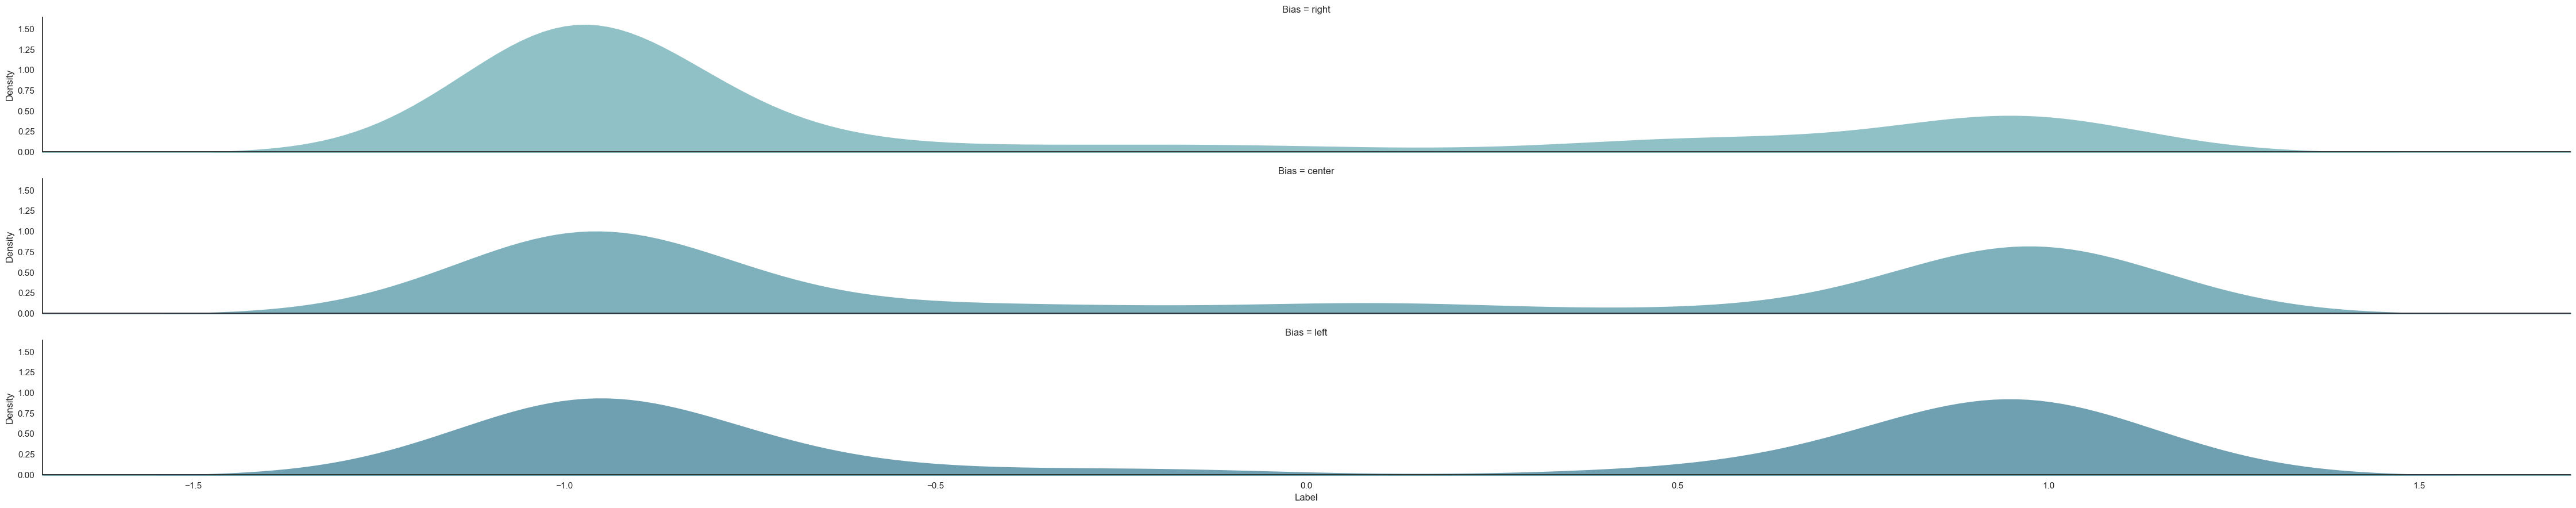

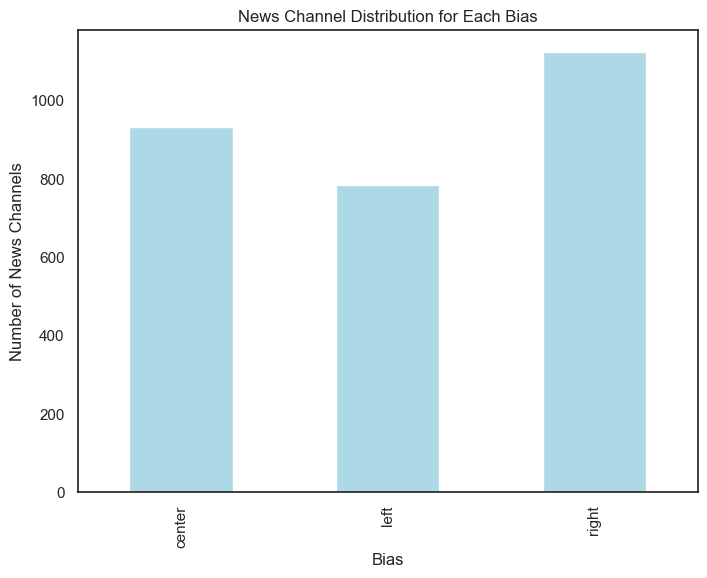

In [204]:
create_histpgram(data,"Immigration")
create_boxplot(data,"Immigration")
sentiment_plot = densityplot('Label',data,"Immigration") 
distribution(data,"Immigration")
news_channel_dist(data,"Immigration")


# Environment and Sustainability

/var/folders/0g/5jl4b1d12lvc6g70prn2_rnr0000gn/T/ipykernel_62143/3432250000.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Bias'] = data['Bias'].replace({"left": 'Left', "center": 'Center', "right": 'Right'})
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:854: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.2`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  func(*plot_args, **plot_kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`;

         count         mean          std    min     25%     50%      75%  \
Bias                                                                       
center  1524.0  2421.895669  2640.075284   36.0   903.0  1669.0  2991.25   
left     750.0  2768.125333  2231.126194  102.0  1293.0  2319.0  3640.00   
right    238.0  2799.268908  1497.226035  648.0  1689.0  2495.5  3350.00   

            max  
Bias             
center  23680.0  
left    13852.0  
right    8831.0  


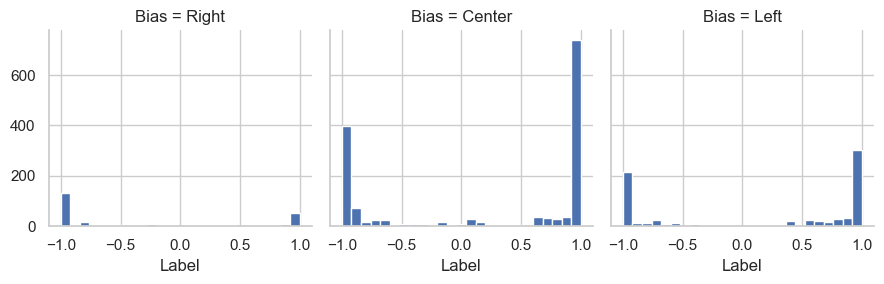

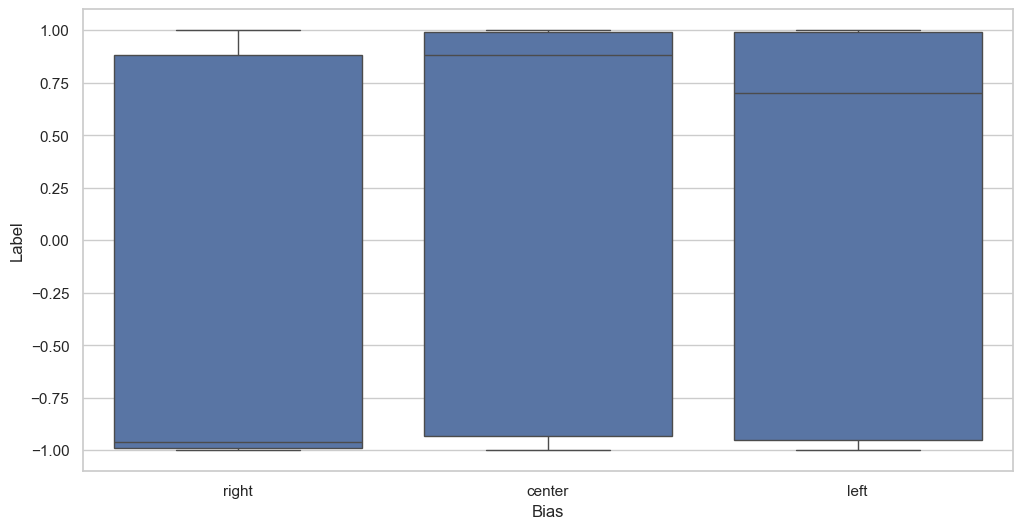

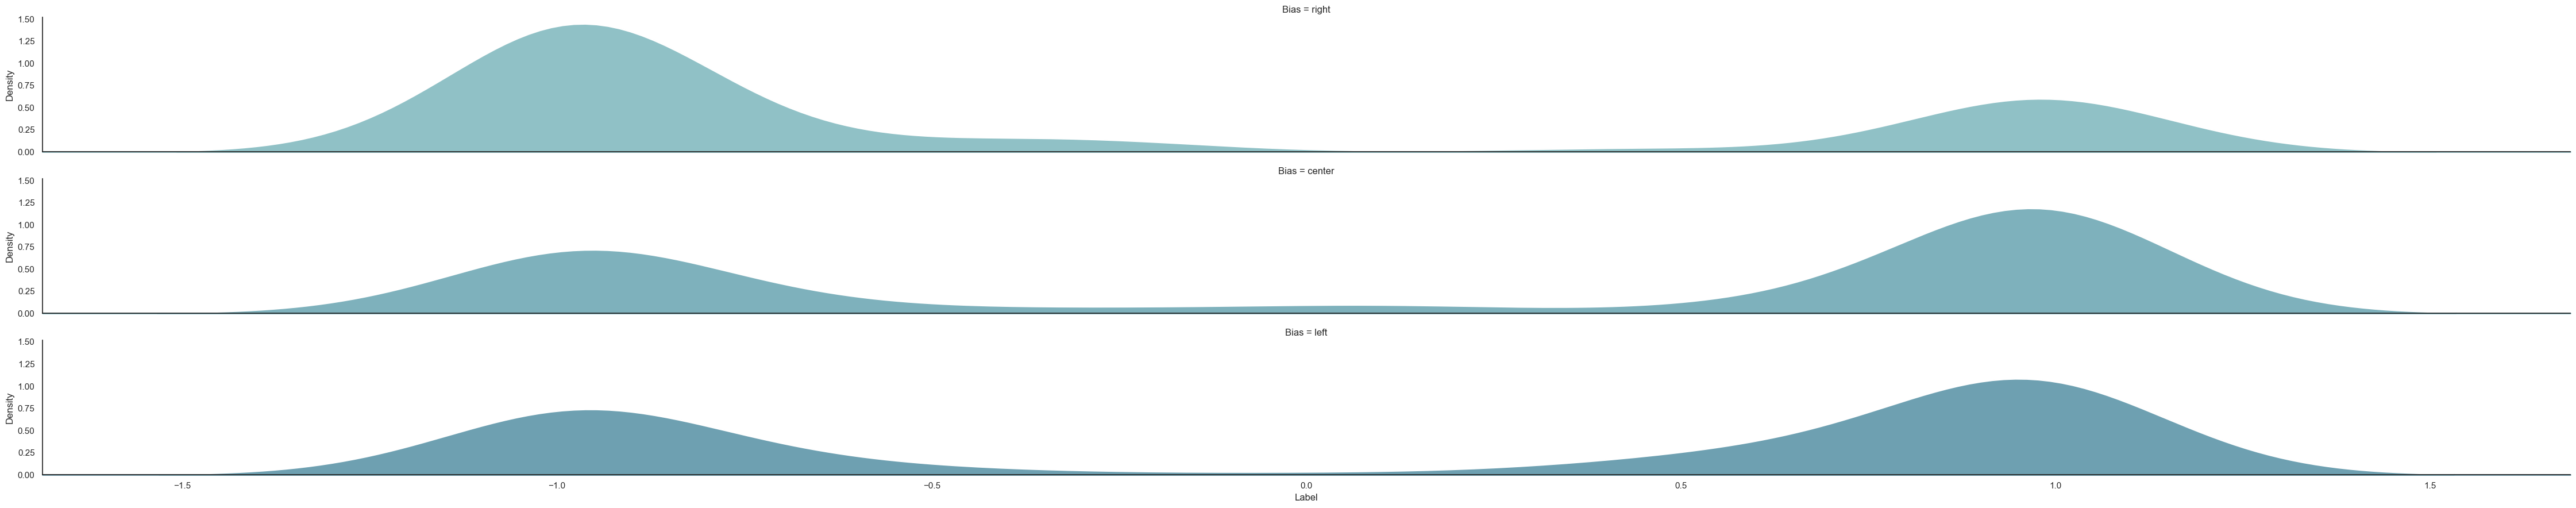

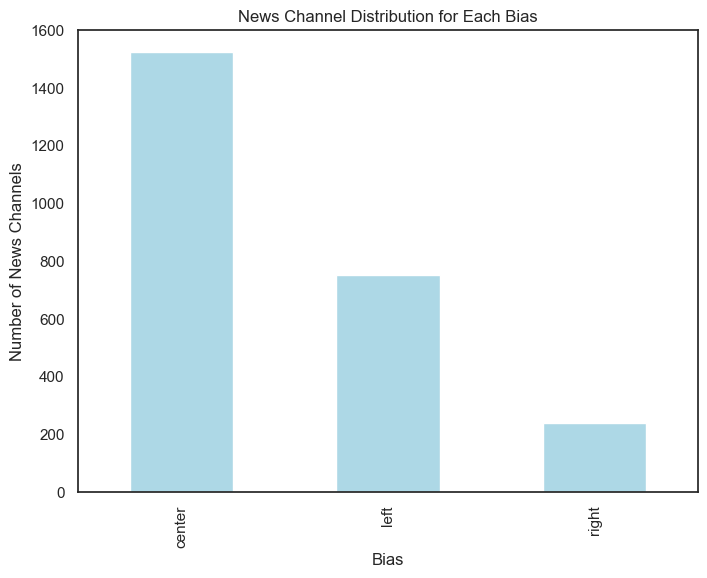

In [207]:
create_histpgram(data,"Environment and Sustainability")
create_boxplot(data,"Environment and Sustainability")
sentiment_plot = densityplot('Label',data,"Environment and Sustainability") 
distribution(data,"Environment and Sustainability")
news_channel_dist(data,"Environment and Sustainability")

# Public Healthcare

/var/folders/0g/5jl4b1d12lvc6g70prn2_rnr0000gn/T/ipykernel_62143/3432250000.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Bias'] = data['Bias'].replace({"left": 'Left', "center": 'Center', "right": 'Right'})
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:854: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.2`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  func(*plot_args, **plot_kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`;

         count         mean          std    min      25%     50%     75%  \
Bias                                                                       
center  1526.0  2071.101573  1678.290788   47.0   966.25  1760.0  2670.0   
left     620.0  3258.450000  5421.869320  102.0  1354.00  2308.0  3692.0   
right    392.0  2989.433673  1928.890292  670.0  1978.00  2527.0  3397.0   

            max  
Bias             
center  15800.0  
left    53976.0  
right   12822.0  


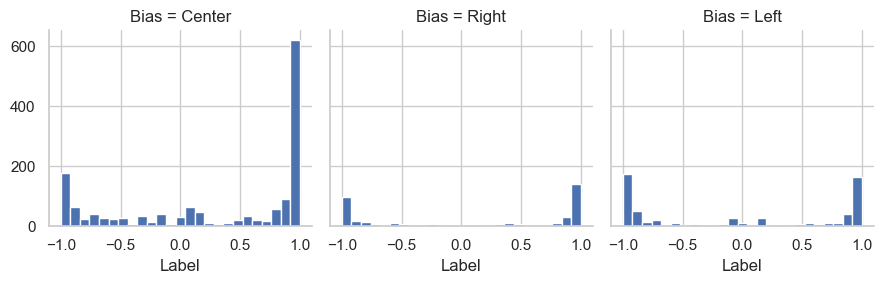

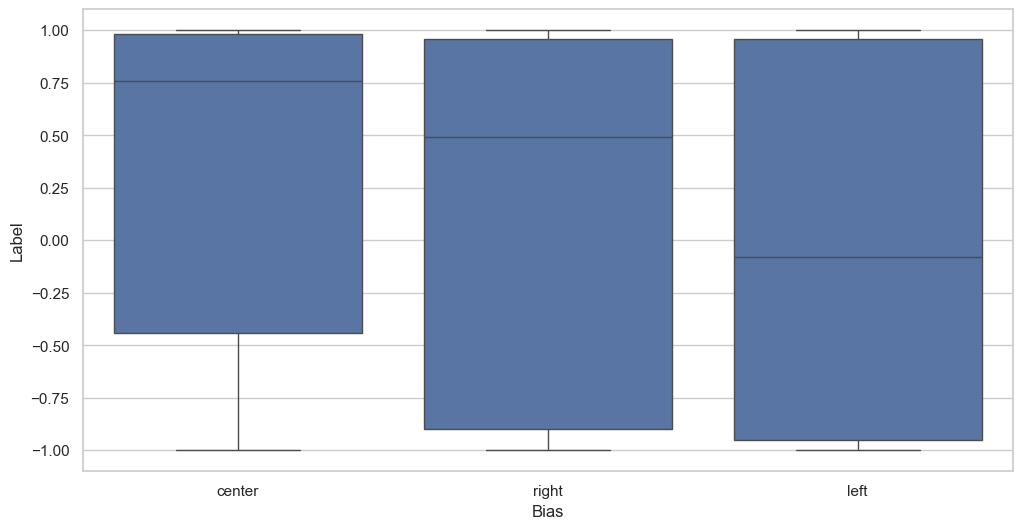

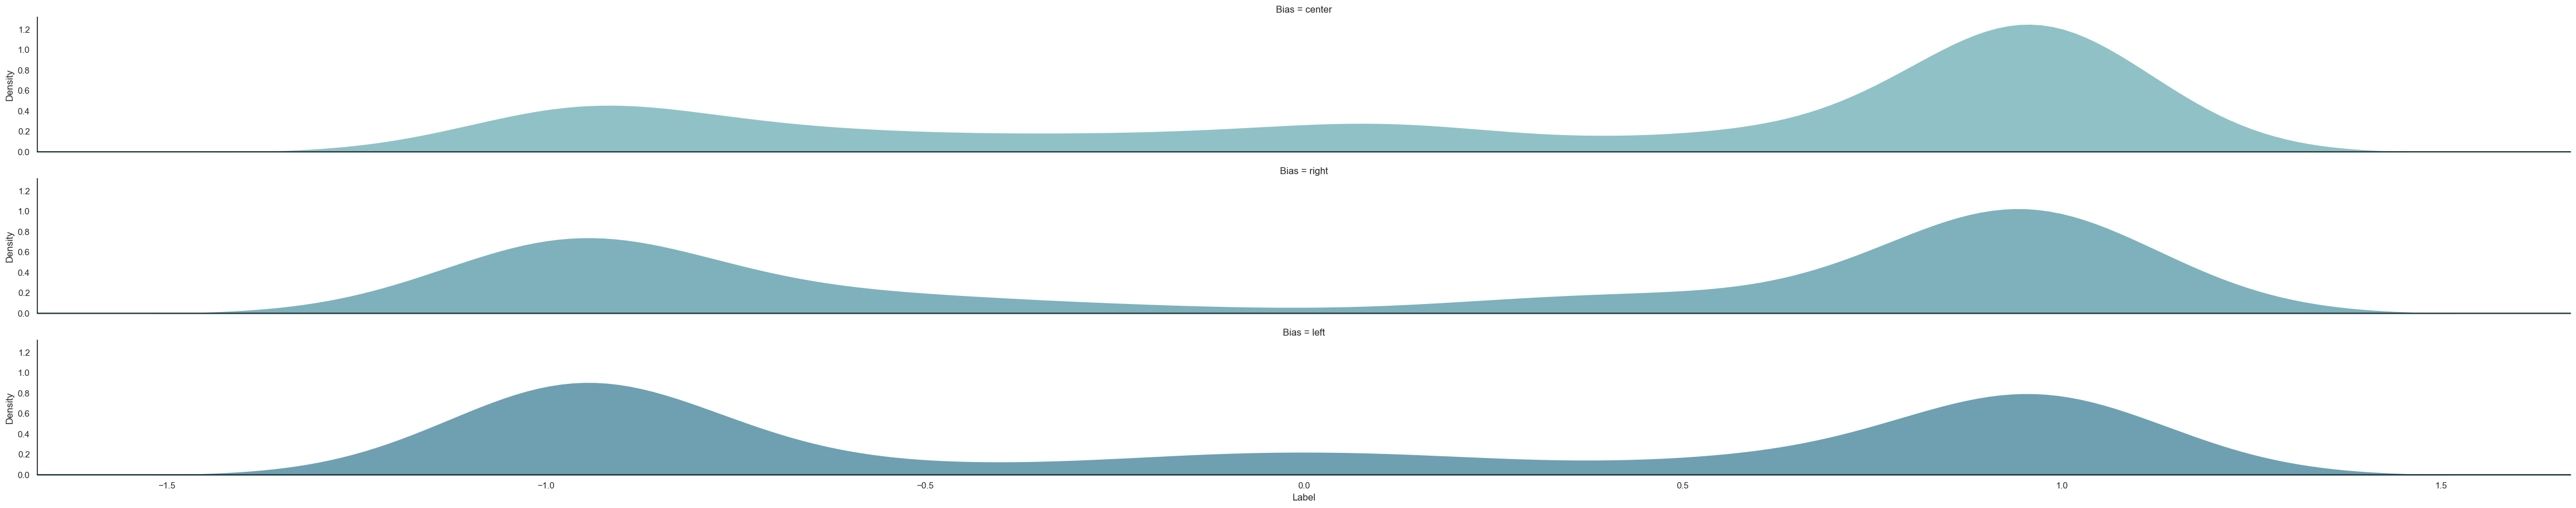

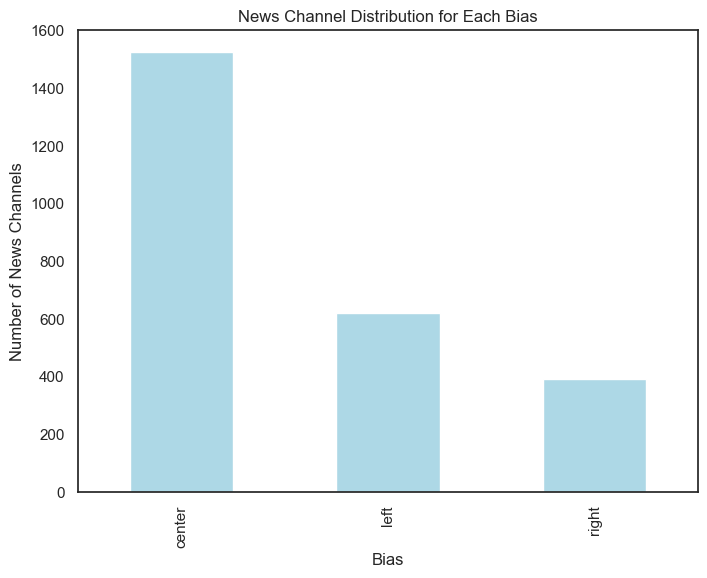

In [206]:
create_histpgram(data,"Public Healthcare")
create_boxplot(data,"Public Healthcare")
sentiment_plot = densityplot('Label',data,"Public Healthcare") 
distribution(data,"Public Healthcare")
news_channel_dist(data,"Public Healthcare")